In [24]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [38]:
# Importing dataset - the generated simulator data
#data = pd.read_csv('../tools/testdata', delimiter=",")
data = pd.read_csv('../data/containerData.csv', delimiter=",")
data.head()

,Timestamp,ID,Temperature(celsius),Target_Temperature(celsius),Amp,CumulativePowerConsumption,ContentType,Humidity,CO2,Door_Open,Maintainence_Required,Defrost_Cycle
0,2019-03-19 T15:50 Z,1739,1.166314,4.4,3.292374,11.506573,3,8.869222,7.495099,0,1,6
1,2019-03-19 T16:05 Z,1739,3.979301,4.4,2.942407,11.727594,4,-2.336991,-3.540896,0,1,6
2,2019-03-19 T16:20 Z,1739,1.070377,4.4,2.409779,8.050487,1,10.142936,15.937540,0,1,6
3,2019-03-19 T16:35 Z,1739,9.552380,4.4,3.940449,8.882198,2,13.710208,3.214708,0,1,6
4,2019-03-19 T16:50 Z,1739,7.927455,4.4,3.790703,12.315440,3,1.539946,17.381030,0,1,6


In [39]:
# Convert dataset into array for the independent variables (features)
#X = np.asarray(data[['Temperature(celsius)','Target_Temperature(celsius)','Power','PowerConsumption','ContentType','O2','CO2','Time_Door_Open','Maintenance_Required','Defrost_Cycle']])
X = np.asarray(data[['Temperature(celsius)', 'Door_Open','Target_Temperature(celsius)','Amp','ContentType','CumulativePowerConsumption'
                          ,'Humidity','CO2','Defrost_Cycle']])
X[0:5]

array([[ 1.17,  0.  ,  4.4 ,  3.29,  3.  , 11.51,  8.87,  7.5 ,  6.  ],
       [ 3.98,  0.  ,  4.4 ,  2.94,  4.  , 11.73, -2.34, -3.54,  6.  ],
       [ 1.07,  0.  ,  4.4 ,  2.41,  1.  ,  8.05, 10.14, 15.94,  6.  ],
       [ 9.55,  0.  ,  4.4 ,  3.94,  2.  ,  8.88, 13.71,  3.21,  6.  ],
       [ 7.93,  0.  ,  4.4 ,  3.79,  3.  , 12.32,  1.54, 17.38,  6.  ]])

In [41]:
# Convert dataset into array for the dependent (objective) variables
#y = np.asarray(data['Maintenance_Required'])
y = np.asarray(data['Maintainence_Required'])
y [0:5]

array([1, 1, 1, 1, 1])

In [42]:
# Normalize/standardize (mean = 0 and standard deviation = 1) 
# your features before applying machine learning techniques.
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.46, -0.58,  1.  ,  0.77, -0.01,  0.78, -0.28, -0.66,  0.  ],
       [-0.37, -0.58,  1.  ,  0.43,  0.7 ,  0.89, -2.33, -2.91,  0.  ],
       [-0.46, -0.58,  1.  , -0.1 , -1.44, -0.96, -0.05,  1.07,  0.  ],
       [-0.2 , -0.58,  1.  ,  1.42, -0.73, -0.55,  0.61, -1.53,  0.  ],
       [-0.25, -0.58,  1.  ,  1.27, -0.01,  1.18, -1.62,  1.36,  0.  ]])

In [43]:
## split the dataset into train and test to estiamte model accuracy 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (3200, 9) (3200,)
Test set: (800, 9) (800,)


In [44]:
## As we are trying to acheive a binary classification, we use Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
## Predict using the trained LR model
yhat = LR.predict(X_test)
yhat

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,

In [46]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.37, 0.63],
       [0.37, 0.63],
       [0.36, 0.64],
       ...,
       [0.38, 0.62],
       [0.37, 0.63],
       [0.34, 0.66]])

In [47]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.77375

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    print(confusion_matrix(y_test, yhat, labels=[1,0]))

Confusion matrix, without normalization
[[409   0]
 [181 210]]
[[409   0]
 [181 210]]


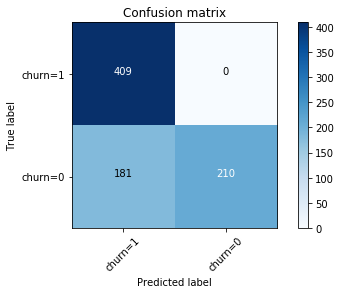

In [49]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [50]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       1.00      0.54      0.70       391
           1       0.69      1.00      0.82       409

    accuracy                           0.77       800
   macro avg       0.85      0.77      0.76       800
weighted avg       0.84      0.77      0.76       800



In [52]:

from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)


0.4825733224165527

In [17]:
import pickle

#loading a model from a file called model.pkl
#serializing our model to a file called model.pkl
pickle.dump(LR, open("model_logistic_regression.pkl","wb"))